In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'
plt.rc('font', family='Arial')

In [2]:
df_2021 = pd.read_csv('./microdados_ed_superior/2021/MICRODADOS_CADASTRO_CURSOS_2021.CSV', sep=';',encoding='latin', low_memory=False)
df_2020 = pd.read_csv('./microdados_ed_superior/2020/MICRODADOS_CADASTRO_CURSOS_2020.CSV', sep=';',encoding='latin', low_memory=False)
df_2019 = pd.read_csv('./microdados_ed_superior/2019/MICRODADOS_CADASTRO_CURSOS_2019.CSV', sep=';',encoding='latin', low_memory=False)
df_2018 = pd.read_csv('./microdados_ed_superior/2018/MICRODADOS_CADASTRO_CURSOS_2018.CSV', sep=';',encoding='latin', low_memory=False)
df_2017 = pd.read_csv('./microdados_ed_superior/2017/MICRODADOS_CADASTRO_CURSOS_2017.CSV', sep=';',encoding='latin', low_memory=False)
df_2016 = pd.read_csv('./microdados_ed_superior/2016/MICRODADOS_CADASTRO_CURSOS_2016.CSV', sep=';',encoding='latin', low_memory=False)
df = pd.concat([df_2021, df_2020, df_2019, df_2018, df_2017, df_2016])


In [3]:
df.dropna(subset=['NO_REGIAO'], inplace=True)
df['TP_REDE'] = df['TP_REDE'].replace(to_replace={1: 'PÚBLICA', 2: 'PRIVADA'})

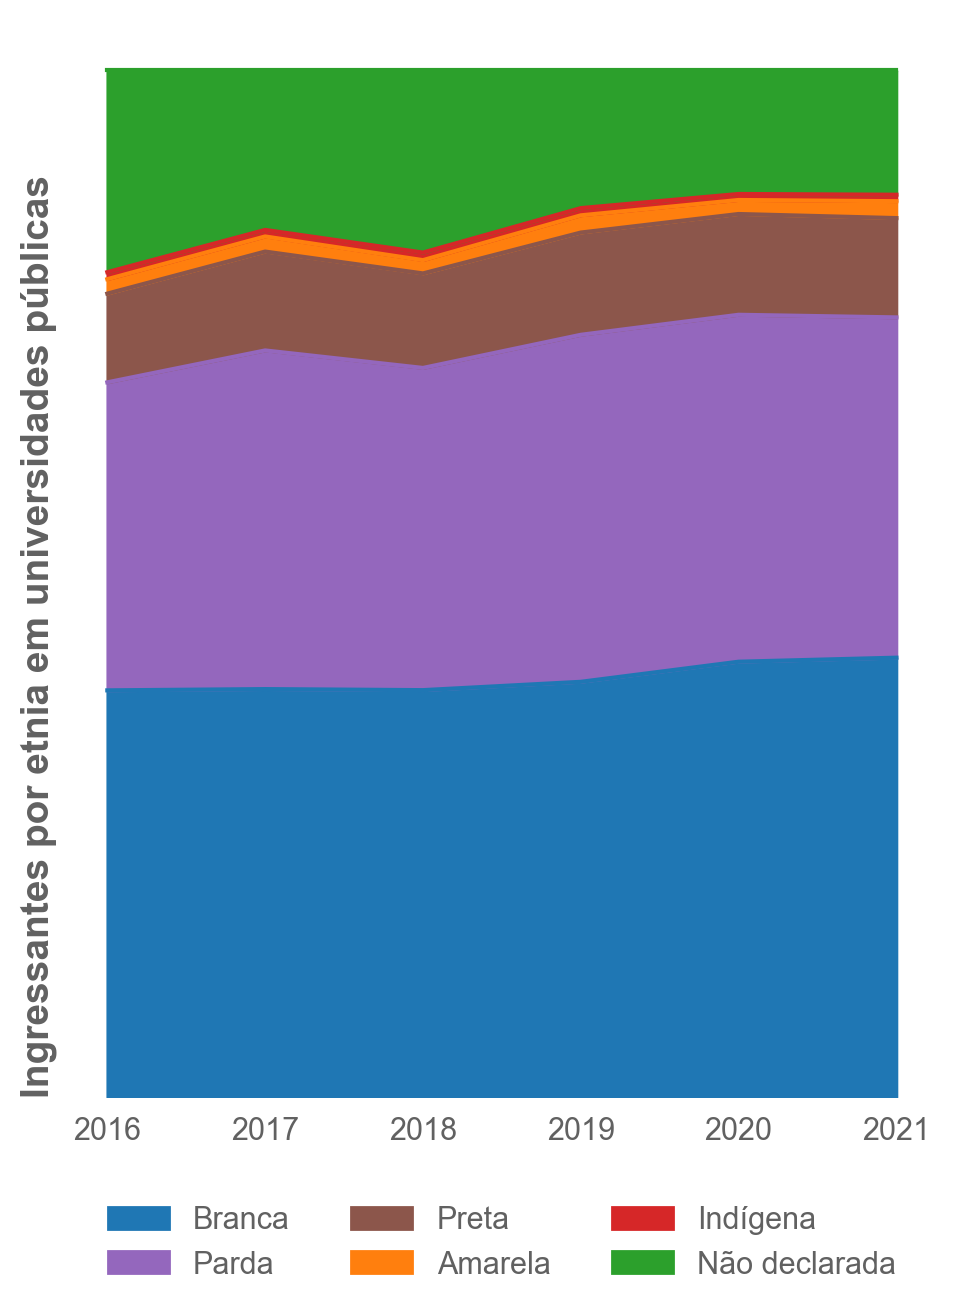

In [110]:
df_ingressantes_etnia_PUBLICA = df[
    ['NU_ANO_CENSO', 'TP_REDE', 'QT_ING_BRANCA', 'QT_ING_PRETA', 'QT_ING_PARDA', 'QT_ING_AMARELA', 'QT_ING_INDIGENA', 'QT_ING_CORND']
    ].groupby(['NU_ANO_CENSO', 'TP_REDE']).sum().apply(lambda x: x / x.sum() * 100, axis=1).reset_index().loc[lambda df: df['TP_REDE'] == 'PÚBLICA']

df_ingressantes_etnia_PUBLICA.columns = ['Ano', 'Tipo', 'Branca', 'Preta',
       'Parda', 'Amarela', 'Indígena', 'Não declarada']
df_ingressantes_etnia_PUBLICA = df_ingressantes_etnia_PUBLICA[['Ano', 'Tipo', 'Branca', 'Parda', 'Preta', 'Amarela', 'Indígena', 'Não declarada']]

ax = df_ingressantes_etnia_PUBLICA.set_index('Ano').plot(kind='area', figsize=(5.6,7), stacked=True, color=('#1F77B4', '#9467BD', '#8C564B', '#FF7F0E', '#D62728', '#2CA02C'))
ax.set_xticks([2016, 2017, 2018, 2019, 2020, 2021])

#plt.title('Ingressantes por etnia em universidades públicas', fontsize=12, color='#616161', loc='center', fontweight='bold')
plt.xlabel('')
ax.tick_params(axis='x', colors='#616161')
plt.ylabel('Ingressantes por etnia em universidades públicas', fontsize=14, color='#616161', loc='bottom', fontweight='bold')
plt.legend(fontsize=11, loc='upper center', bbox_to_anchor=(0.5, -0.075),fancybox=False, shadow=False, ncol=3, frameon=False, labelcolor='#616161')
plt.tick_params(left = False, bottom=False, labelleft = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(fontsize=11, color='#616161')
plt.grid(False)
plt.savefig('Ingressantes_por_etnia_em_universidades_publicass.pdf', format="pdf", bbox_inches="tight")
plt.show()


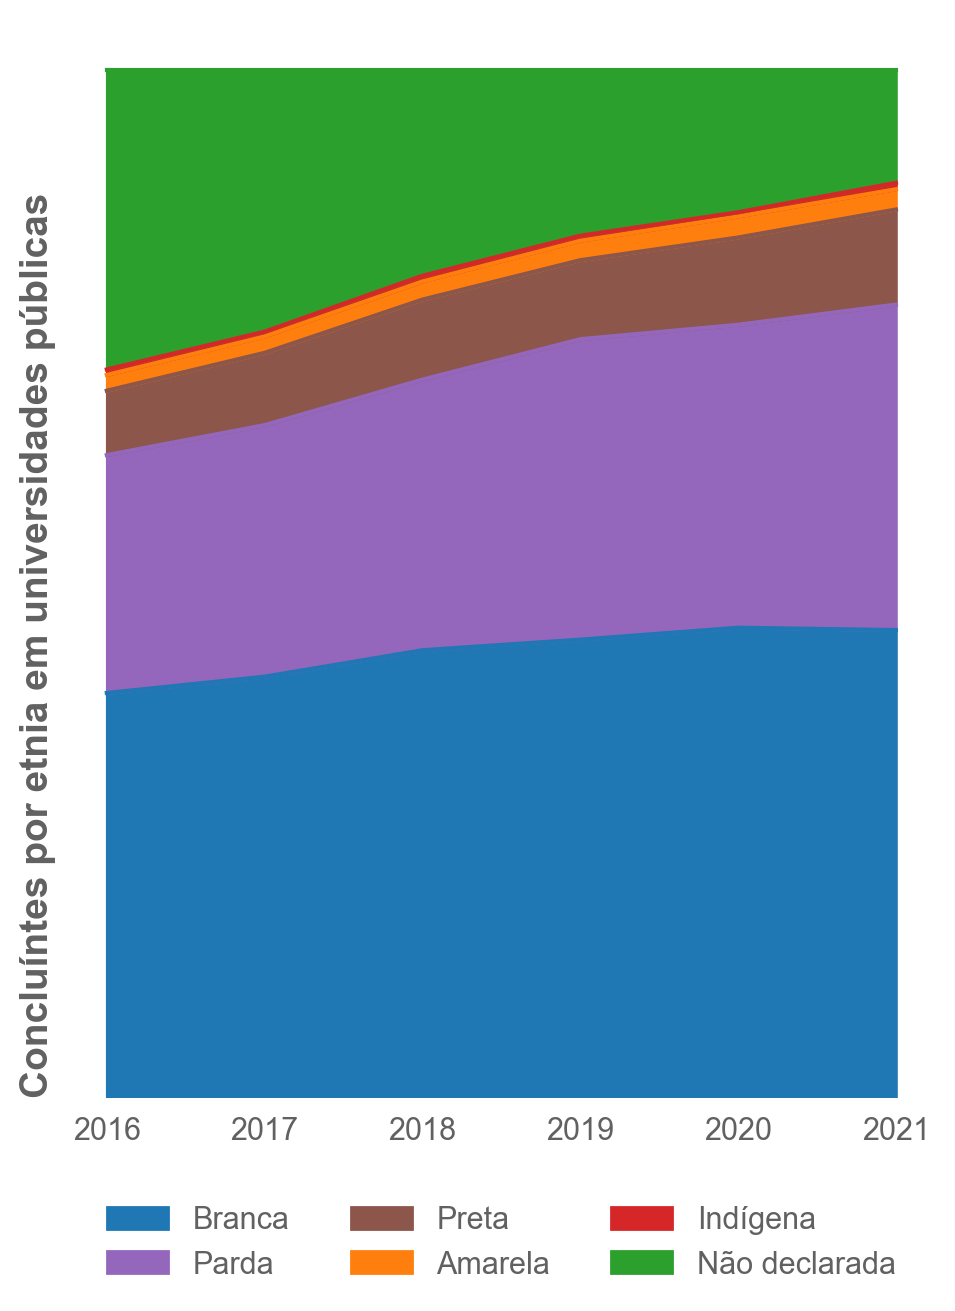

In [123]:
df_concluintes_etnia_PUBLICA = df[
    ['NU_ANO_CENSO', 'TP_REDE', 'QT_CONC_BRANCA', 'QT_CONC_PRETA', 'QT_CONC_PARDA', 'QT_CONC_AMARELA', 'QT_CONC_INDIGENA', 'QT_CONC_CORND']
    ].groupby(['NU_ANO_CENSO', 'TP_REDE']).sum().apply(lambda x: x / x.sum() * 100, axis=1).reset_index().loc[lambda df: df['TP_REDE'] == 'PÚBLICA']

df_concluintes_etnia_PUBLICA.columns = ['Ano', 'Tipo', 'Branca', 'Preta',
       'Parda', 'Amarela', 'Indígena', 'Não declarada']
df_concluintes_etnia_PUBLICA = df_concluintes_etnia_PUBLICA[['Ano', 'Tipo', 'Branca', 'Parda', 'Preta', 'Amarela', 'Indígena', 'Não declarada']]

ax = df_concluintes_etnia_PUBLICA.set_index('Ano').plot(kind='area', figsize=(5.6,7), stacked=True, color=('#1F77B4', '#9467BD', '#8C564B', '#FF7F0E', '#D62728', '#2CA02C'))

ax.set_xticks([2016, 2017, 2018, 2019, 2020, 2021])

#plt.title('Concluíntes por etnia em universidades públicas', fontsize=12, color='#616161', loc='center', fontweight='bold')
plt.xlabel('')
ax.tick_params(axis='x', colors='#616161')
plt.ylabel('Concluíntes por etnia em universidades públicas', fontsize=14, color='#616161', loc='bottom', fontweight='bold')
plt.legend(fontsize=11, loc='upper center', bbox_to_anchor=(0.5, -0.075),fancybox=False, shadow=False, ncol=3, frameon=False, labelcolor='#616161')
plt.tick_params(left = False, bottom=False, labelleft = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(fontsize=11, color='#616161')
plt.grid(False)
plt.savefig('Concluintes_por_etnia_em_universidades_publicass.pdf', format="pdf", bbox_inches="tight")
plt.show()


In [124]:
df_publicas = df.loc[df['TP_REDE'] == 'PÚBLICA'].copy()

df_formandos_publicas_etnia = df_publicas[['NU_ANO_CENSO', 'QT_CONC_BRANCA', 'QT_CONC_PRETA', 'QT_CONC_PARDA', 'QT_CONC_AMARELA', 'QT_CONC_INDIGENA', 'QT_CONC_CORND']
    ].groupby(['NU_ANO_CENSO']).sum().reset_index()

df_ingressantes_publicas_etnia = df_publicas[['NU_ANO_CENSO', 'QT_ING_BRANCA', 'QT_ING_PRETA', 'QT_ING_PARDA', 'QT_ING_AMARELA', 'QT_ING_INDIGENA', 'QT_ING_CORND']
    ].groupby(['NU_ANO_CENSO']).sum().reset_index()

df_entrada_saida_publicas_etnia= df_formandos_publicas_etnia.merge(df_ingressantes_publicas_etnia[
    ['NU_ANO_CENSO', 'QT_ING_BRANCA', 'QT_ING_PRETA', 'QT_ING_PARDA', 'QT_ING_AMARELA', 'QT_ING_INDIGENA', 'QT_ING_CORND']
    ], how='left', left_on='NU_ANO_CENSO', right_on='NU_ANO_CENSO').set_index('NU_ANO_CENSO').reset_index().copy()
    
df_entrada_saida_publicas_etnia['Branca'] = df_entrada_saida_publicas_etnia['QT_CONC_BRANCA']/df_entrada_saida_publicas_etnia['QT_ING_BRANCA']
df_entrada_saida_publicas_etnia['Preta'] = df_entrada_saida_publicas_etnia['QT_CONC_PRETA']/df_entrada_saida_publicas_etnia['QT_ING_PRETA']
df_entrada_saida_publicas_etnia['Parda'] = df_entrada_saida_publicas_etnia['QT_CONC_PARDA']/df_entrada_saida_publicas_etnia['QT_ING_PARDA']
df_entrada_saida_publicas_etnia['Amarela'] = df_entrada_saida_publicas_etnia['QT_CONC_AMARELA']/df_entrada_saida_publicas_etnia['QT_ING_AMARELA']
df_entrada_saida_publicas_etnia['Indígena'] = df_entrada_saida_publicas_etnia['QT_CONC_INDIGENA']/df_entrada_saida_publicas_etnia['QT_ING_INDIGENA']
df_entrada_saida_publicas_etnia['Não declarada'] = df_entrada_saida_publicas_etnia['QT_CONC_CORND']/df_entrada_saida_publicas_etnia['QT_ING_CORND']

df_entrada_saida_publicas_etnia = df_entrada_saida_publicas_etnia[['NU_ANO_CENSO','Branca','Preta','Parda','Amarela','Indígena','Não declarada']].set_index('NU_ANO_CENSO')
df_entrada_saida_publicas_etnia

,Branca,Preta,Parda,Amarela,Indígena,Não declarada
NU_ANO_CENSO,,,,,,
2016,0.463280,0.338432,0.360141,0.507645,0.367386,0.691158
2017,0.441274,0.313172,0.318051,0.463417,0.317735,0.701413
2018,0.490345,0.378222,0.375027,0.608140,0.338242,0.503391
2019,0.495219,0.347416,0.389241,0.506608,0.317222,0.539559
2020,0.417792,0.335588,0.338375,0.581886,0.271104,0.444816
2021,0.473758,0.426855,0.426319,0.534287,0.442003,0.403048


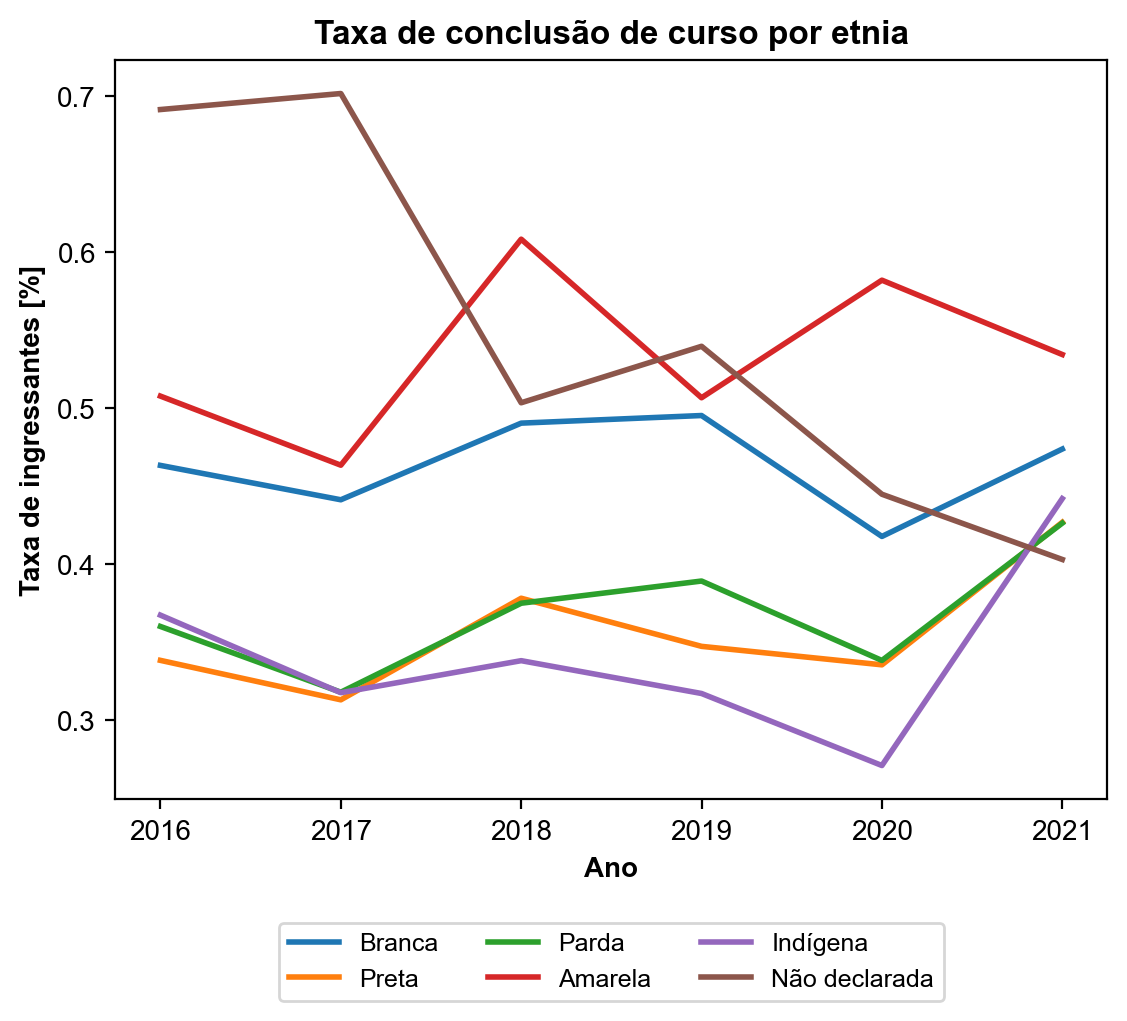

In [125]:
for tipo_etnia in df_entrada_saida_publicas_etnia.columns:
    dados = df_entrada_saida_publicas_etnia[tipo_etnia]
    plt.plot(dados.index, dados.values, label=tipo_etnia.capitalize(), linewidth=2)
    
plt.title('Taxa de conclusão de curso por etnia', fontweight='bold')
ax.set_xticks([2016, 2017, 2018, 2019, 2020, 2021])
plt.xlabel('Ano', fontweight='bold')
plt.ylabel('Taxa de ingressantes [%]', fontweight='bold')
plt.legend(fontsize=9, loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=False, ncol=3)
plt.show()

In [117]:
df_entrada_saida_publicas_etnia_2 = df_entrada_saida_publicas_etnia.reset_index().melt(id_vars='NU_ANO_CENSO', var_name='ETNIA', value_name='PERCENTUAL').copy()
df_entrada_saida_publicas_etnia_2.drop(index=[30, 31, 32, 33, 34, 35], inplace=True)

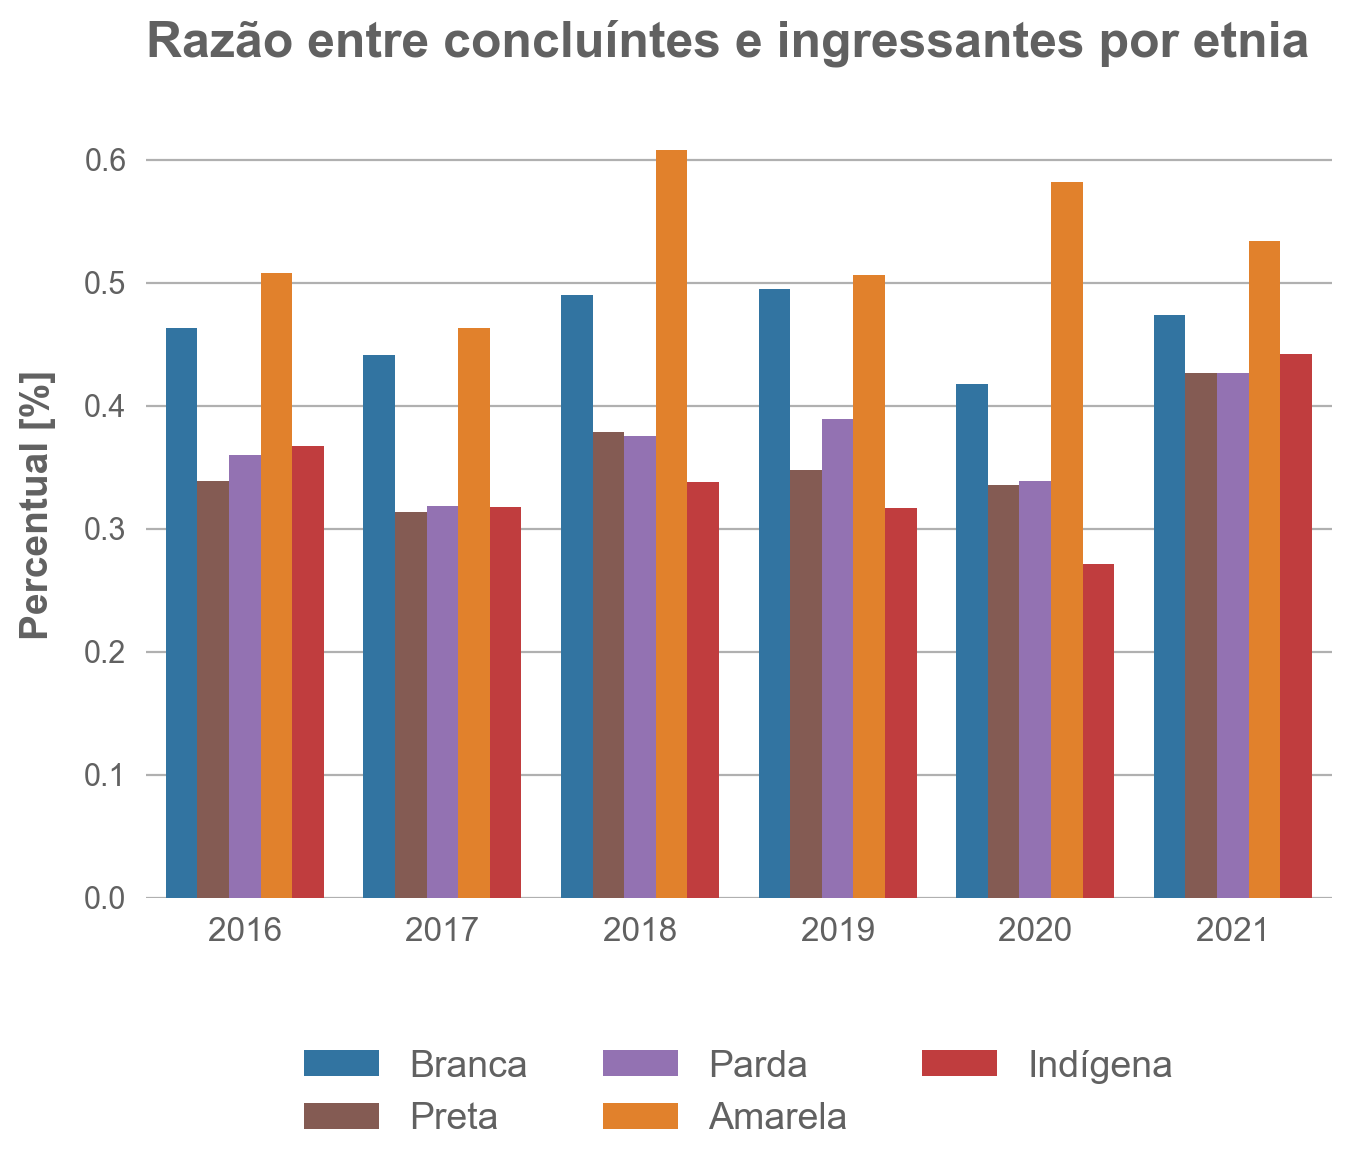

In [148]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(9*0.85, 6*0.85))

# Criando o gráfico de barras
ax = sns.barplot(x='NU_ANO_CENSO', y='PERCENTUAL', hue='ETNIA', data=df_entrada_saida_publicas_etnia_2, palette=('#1F77B4', '#8C564B', '#9467BD', '#FF7F0E', '#D62728', '#2CA02C'), zorder=2)
ax.grid(axis='y', zorder=1)
# Definindo a posição da legenda para abaixo do gráfico

# Adicionando rótulos dos eixos e título, e plotando
plt.xlabel('', fontsize=0, color='#616161', fontweight='bold')
plt.ylabel('Percentual [%]', fontsize=14, color='#616161', labelpad=10, fontweight='bold')
plt.title('Razão entre concluíntes e ingressantes por etnia', loc='left', fontsize=18, fontweight='bold', color='#616161', pad=20)
plt.legend(fontsize=13.5, loc='upper center', bbox_to_anchor=(0.5, -0.15),fancybox=False, shadow=False, ncol=3, frameon=False, labelcolor='#616161')
plt.tick_params(left = False, bottom=False, labelleft = True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(fontsize=12, color='#616161')
plt.yticks(fontsize=11, color='#616161')

plt.savefig('razao_entre_concluintes_ingressantes.pdf', format="pdf", bbox_inches="tight")
plt.show()


In [8]:
df_alunos_publicas_escolapublica = df_publicas[['NU_ANO_CENSO', 'QT_ING_PROCESCPUBLICA', 'QT_ING_PROCESCPRIVADA', 'QT_CONC_PROCESCPUBLICA', 'QT_CONC_PROCESCPRIVADA']
    ].groupby(['NU_ANO_CENSO']).sum().reset_index()


df_alunos_publicas_escolapublica['Q_PUB'] = df_alunos_publicas_escolapublica['QT_CONC_PROCESCPUBLICA']/df_alunos_publicas_escolapublica['QT_ING_PROCESCPUBLICA']
df_alunos_publicas_escolapublica['Q_PRI'] = df_alunos_publicas_escolapublica['QT_CONC_PROCESCPRIVADA']/df_alunos_publicas_escolapublica['QT_ING_PROCESCPRIVADA']

df_alunos_publicas_escolapublica = df_alunos_publicas_escolapublica.set_index('NU_ANO_CENSO')
df_alunos_publicas_escolapublica

,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_CONC_PROCESCPUBLICA,QT_CONC_PROCESCPRIVADA,Q_PUB,Q_PRI
NU_ANO_CENSO,,,,,,
2016,334239.0,195190.0,126214.0,88505.0,0.377616,0.453430
2017,383818.0,205809.0,133895.0,96605.0,0.348850,0.469392
2018,374142.0,206825.0,143778.0,106894.0,0.384287,0.516833
2019,376275.0,182753.0,148177.0,98811.0,0.393800,0.540681
2020,364495.0,162454.0,125505.0,77613.0,0.344326,0.477754
2021,347446.0,144694.0,136466.0,82354.0,0.392769,0.569160


In [9]:
df_alunos_publicas_apoio = df_publicas[['NU_ANO_CENSO', 'QT_ING_APOIO_SOCIAL', 'QT_CONC_APOIO_SOCIAL']
    ].groupby(['NU_ANO_CENSO']).sum().reset_index()


df_alunos_publicas_apoio['Q_APOIO_SOCIAL'] = df_alunos_publicas_apoio['QT_CONC_APOIO_SOCIAL']/df_alunos_publicas_apoio['QT_ING_APOIO_SOCIAL']

df_alunos_publicas_apoio = df_alunos_publicas_apoio.set_index('NU_ANO_CENSO')
df_alunos_publicas_apoio #sobretudo na pandemia

,QT_ING_APOIO_SOCIAL,QT_CONC_APOIO_SOCIAL,Q_APOIO_SOCIAL
NU_ANO_CENSO,,,
2016,71055.0,32834.0,0.462093
2017,73370.0,35571.0,0.484817
2018,80054.0,37340.0,0.466435
2019,92779.0,41637.0,0.448776
2020,60186.0,31030.0,0.515568
2021,49126.0,33910.0,0.690266
